In [1]:
import pandas as pd

In [2]:
file= pd.read_csv('D:\\Downloads\\Admission_Predict.csv')

In [3]:
file

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
file.loc[file['Chance of Admit ']>=0.5, 'Chance of Admit ']=1
file.loc[file['Chance of Admit ']<0.5, 'Chance of Admit ']=0

In [6]:
file['Chance of Admit ']= file['Chance of Admit '].astype(int)

In [8]:
from sklearn.model_selection import train_test_split

In [18]:
column= ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
x= file.drop('Chance of Admit ',axis=1)
y=file['Chance of Admit ']

In [19]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.25, random_state=0)

In [21]:
print(xtrain)
print(xtest)
print(ytrain)
print(ytest)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
250         251        320          104                  3  3.0   2.5  8.57   
63           64        315          107                  2  4.0   3.0  8.50   
312         313        311          107                  4  4.5   4.5  9.00   
159         160        297          100                  1  1.5   2.0  7.90   
283         284        321          111                  3  2.5   3.0  8.90   
..          ...        ...          ...                ...  ...   ...   ...   
323         324        305          102                  2  2.0   2.5  8.18   
192         193        322          114                  5  4.5   4.0  8.94   
117         118        290          104                  4  2.0   2.5  7.46   
47           48        339          119                  5  4.5   4.0  9.70   
172         173        322          110                  4  4.0   5.0  9.13   

     Research  
250         1  
63          1  
312

In [24]:
from sklearn.svm import SVC

In [27]:
linearKernelClassifier= SVC(kernel='linear')
linearKernelClassifier.fit(xtrain, ytrain)
yprec1= linearKernelClassifier.predict(xtest)

In [28]:
polyKernelClassifier= SVC(kernel='poly')
polyKernelClassifier.fit(xtrain, ytrain)
yprec2= polyKernelClassifier.predict(xtest)

In [30]:
rbfKernelClassifier= SVC(kernel='rbf')
rbfKernelClassifier.fit(xtrain, ytrain)
yprec3= rbfKernelClassifier.predict(xtest)

In [31]:
sigmoidKernelClassifier= SVC(kernel='sigmoid')
sigmoidKernelClassifier.fit(xtrain, ytrain)
yprec4= sigmoidKernelClassifier.predict(xtest)

In [35]:
final= pd.DataFrame({'Actual':ytest, 'Linear Kernel': yprec1, 'Polynomial Kernel':yprec2, 'RBF Kernel': yprec3, 'Sigmoid Kernel': yprec4})
final.head()

,Actual,Linear Kernel,Polynomial Kernel,RBF Kernel,Sigmoid Kernel
132,1,1,1,1,1
309,1,1,1,1,1
341,1,1,1,1,1
196,1,1,1,1,1
246,1,1,1,1,1


In [36]:
from sklearn.metrics import accuracy_score

In [40]:
accuracyScore= pd.DataFrame({'Linear Kernel': accuracy_score(ytest, yprec1), 'Polynomial Kernel':accuracy_score(ytest, yprec2), 'RBF Kernel': accuracy_score(ytest, yprec3), 'Sigmoid Kernel': accuracy_score(ytest, yprec4)}, index = [0])
accuracyScore

,Linear Kernel,Polynomial Kernel,RBF Kernel,Sigmoid Kernel
0,0.93,0.93,0.93,0.93


In [41]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy Score')

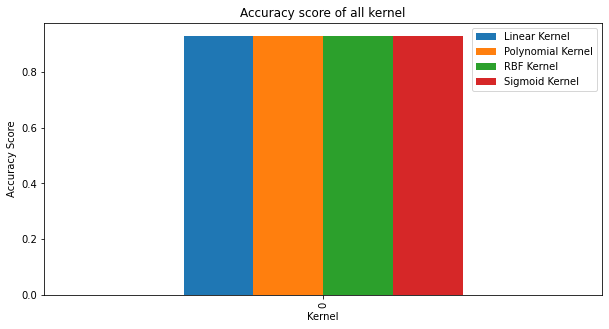

In [42]:
accuracyScore.plot(kind='bar', figsize=(10,5))
plt.title('Accuracy score of all kernel')
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score')

In [43]:
from sklearn.metrics import confusion_matrix

In [45]:
matrix=confusion_matrix(ytest, yprec1)
matrix

array([[ 2,  5],
       [ 2, 91]], dtype=int64)

In [46]:
import seaborn as sns

<AxesSubplot:>

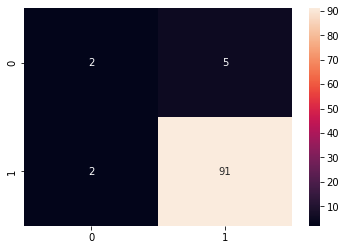

In [47]:
sns.heatmap(matrix, annot=True)